In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [2]:
file_names = [
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.whole-organism.csv",
]


dfs = [pd.read_csv(file_name, sep="\t") for file_name in file_names]

#combined_df = pd.read_csv("combined_df.csv")

In [3]:
interval_measurements = []

for df, context in zip(dfs, file_names):
    context_name = context.split('.')[3] + "-" + ((context.split('/')[5]).split('.')[0]).split('_')[-1] 
    #print(context_name)
    df['interval'] = df['start'].astype(str) + '-' + df['end'].astype(str)  
    context_measurement = df.set_index('interval')['JSD_bit_'].rename(context_name)
    interval_measurements.append(context_measurement)

In [4]:
combined_df = pd.DataFrame()

for series in interval_measurements:
    combined_df = combined_df.join(series, how='outer')


print(combined_df.index.name)  # This should output 'interval'

interval


In [2]:
#combined_df.to_csv("combined_df_chr3.csv")
combined_df = pd.read_csv("combined_df_chr3.csv")

In [39]:
#combined_df.head()
combined_df = combined_df.rename(columns=lambda x: '-'.join(x.split('-')[::-1]).replace('CpG', 'CG'))

print(combined_df.columns)

Index(['CHG-part-aerial', 'CHG-embryo', 'CHG-endosperm',
       'CHG-buds-flower-immature', 'CHG-inflorescence', 'CHG-root',
       'CHG-rosette', 'CHG-shoot', 'CHG-cell-sperm', 'CHG-nucleus-vegetative',
       'CHG-organism-whole', 'CHH-part-aerial', 'CHH-embryo', 'CHH-endosperm',
       'CHH-buds-flower-immature', 'CHH-inflorescence', 'CHH-root',
       'CHH-rosette', 'CHH-shoot', 'CHH-cell-sperm', 'CHH-nucleus-vegetative',
       'CHH-organism-whole', 'CG-part-aerial', 'CG-embryo', 'CG-endosperm',
       'CG-buds-flower-immature', 'CG-inflorescence', 'CG-root', 'CG-rosette',
       'CG-shoot', 'CG-cell-sperm', 'CG-nucleus-vegetative',
       'CG-organism-whole'],
      dtype='object')


ValueError: The condensed distance matrix must contain only finite values.

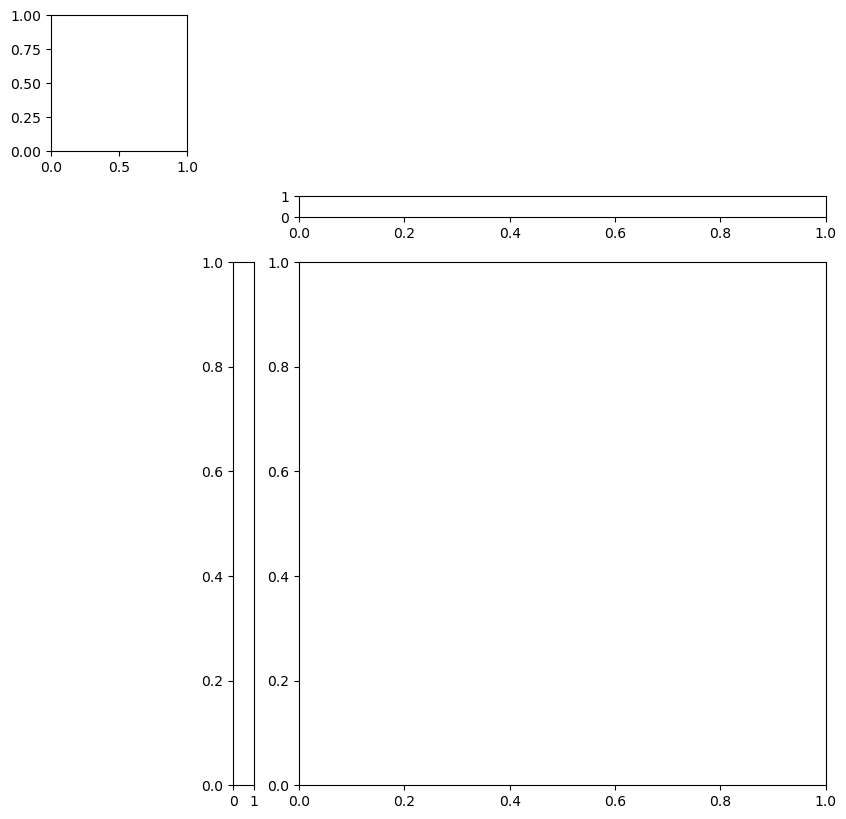

In [50]:
context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[0])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

#numeric_index = combined_df.index.str.split('-').str[0].astype(int)
#combined_df.index = numeric_index

window_size = 50000

windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = combined_df.corr(method='spearman', numeric_only=True)

#correlation_matrix = correlation_matrix.abs() 

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

correlation_matrix =  correlation_matrix ** 2

#correlation_matrix[correlation_matrix < 0.5] = 0.50





sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="coolwarm",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(10, 10))


plt.show()

In [31]:
correlation_matrix


,CHG-part-aerial,CHG-embryo,CHG-endosperm,CHG-buds-flower-immature,CHG-inflorescence,CHG-root,CHG-rosette,CHG-shoot,CHG-cell-sperm,CHG-nucleus-vegetative,...,CpG-embryo,CpG-endosperm,CpG-buds-flower-immature,CpG-inflorescence,CpG-root,CpG-rosette,CpG-shoot,CpG-cell-sperm,CpG-nucleus-vegetative,CpG-organism-whole
CHG-part-aerial,1.000000,0.697515,0.693069,0.668264,0.748480,0.681387,0.228318,0.658275,0.615022,0.623196,...,0.026053,0.782005,0.411407,0.190584,0.438457,0.694083,0.853263,0.267033,0.249219,0.502343
CHG-embryo,0.697515,1.000000,0.917237,0.901270,0.877434,0.679845,0.458231,0.937288,0.736428,0.715233,...,0.012429,0.816766,0.459964,0.390015,0.566849,0.826574,0.774574,0.346986,0.313469,0.598573
CHG-endosperm,0.693069,0.917237,1.000000,0.858596,0.827370,0.675825,0.467617,0.903513,0.691309,0.691721,...,0.001737,0.800037,0.453461,0.396066,0.566415,0.821328,0.754787,0.360201,0.305128,0.584217
CHG-buds-flower-immature,0.668264,0.901270,0.858596,1.000000,0.838023,0.704185,0.446643,0.877708,0.696877,0.701432,...,0.032859,0.789256,0.421855,0.361032,0.512330,0.766301,0.735181,0.321898,0.342273,0.568299
CHG-inflorescence,0.748480,0.877434,0.827370,0.838023,1.000000,0.717781,0.360586,0.852867,0.752933,0.748548,...,0.067779,0.820109,0.448442,0.305973,0.510054,0.788021,0.767905,0.278465,0.377815,0.534437
CHG-root,0.681387,0.679845,0.675825,0.704185,0.717781,1.000000,0.114941,0.663735,0.695805,0.672027,...,0.121059,0.738591,0.269747,0.125103,0.271523,0.554743,0.691605,0.163903,0.386078,0.401259
CHG-rosette,0.228318,0.458231,0.467617,0.446643,0.360586,0.114941,1.000000,0.519242,0.179529,0.171937,...,0.220220,0.335138,0.379235,0.441288,0.505284,0.646099,0.389038,0.415042,0.147867,0.449718
CHG-shoot,0.658275,0.937288,0.903513,0.877708,0.852867,0.663735,0.519242,1.000000,0.681841,0.692930,...,0.027889,0.797121,0.472899,0.414489,0.584904,0.855630,0.770367,0.366600,0.288952,0.609931
CHG-cell-sperm,0.615022,0.736428,0.691309,0.696877,0.752933,0.695805,0.179529,0.681841,1.000000,0.877317,...,0.354014,0.734465,0.162553,0.026433,0.227582,0.507857,0.616524,0.046173,0.622068,0.314543
CHG-nucleus-vegetative,0.623196,0.715233,0.691721,0.701432,0.748548,0.672027,0.171937,0.692930,0.877317,1.000000,...,0.327811,0.769436,0.175152,0.005784,0.235317,0.512940,0.645528,0.026592,0.680291,0.314634
